In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
data = numpy.loadtxt("gauss_line.txt")

In [13]:
data

array([[ -9.98820839,   6.53057101],
       [ -9.98336936,   6.14430077],
       [ -9.97962446,   6.19466599],
       ..., 
       [ 19.94135096,   2.70599525],
       [ 19.94432566,   2.77377707],
       [ 19.96506969,   2.90071879]])

In [18]:
x, y = data[:, 0], data[:, 1]

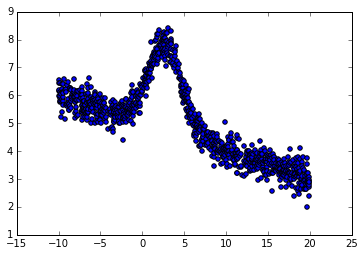

In [19]:
scatter(x, y)

In [25]:
def line_gaussian(x, a, b, ampl, x_0, sigma):
    return a*x + b + ampl*exp( -(x-x_0)**2/sigma )

In [26]:
from scipy.optimize import curve_fit

In [31]:
popt, pcov = curve_fit(line_gaussian, x, y)
y_opt = line_gaussian( x, popt[0], popt[1], popt[2], popt[3], popt[4])

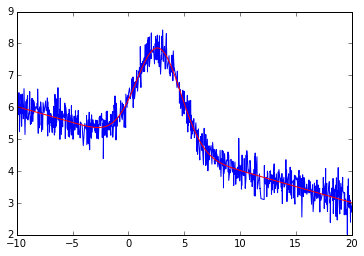

In [33]:
plot(x, y, label="data")
plot(x, y_opt, c="r", label="fitting")

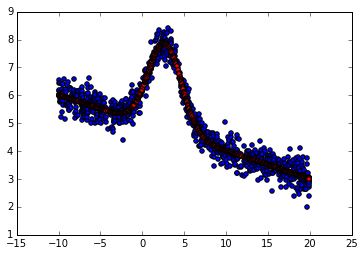

In [34]:
scatter(x, y, label="data")
scatter(x, y_opt, c="r", label="fitting")

In [97]:
## BONO
! wget http://xurl.es/munich.txt 

--2015-10-27 07:36:21--  http://xurl.es/munich.txt
Resolving xurl.es... 82.165.172.202
Connecting to xurl.es|82.165.172.202|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: http://www2.mpia-hd.mpg.de/~robitaille/PY4SCI_SS_2015/_static/data/munich_temperatures_average_with_bad_data.txt [following]
--2015-10-27 07:36:22--  http://www2.mpia-hd.mpg.de/~robitaille/PY4SCI_SS_2015/_static/data/munich_temperatures_average_with_bad_data.txt
Resolving www2.mpia-hd.mpg.de... 149.217.41.8
Connecting to www2.mpia-hd.mpg.de|149.217.41.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125482 (123K) [text/plain]
Saving to: 'munich.txt'

munich.txt          100%[=====================>] 122.54K   142KB/s   in 0.9s   

2015-10-27 07:36:23 (142 KB/s) - 'munich.txt' saved [125482/125482]



In [98]:
weather = np.loadtxt("munich.txt")
time = weather[:,0]
temp = weather[:,1]

In [99]:
index = where((weather[:,1] > -90) & (weather[:,1] < 90))
index = index[0]

In [100]:
time = weather[index,0]
temp = weather[index,1]

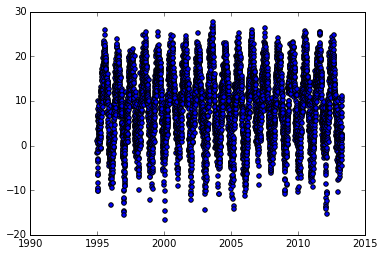

In [101]:
scatter(time, temp)

In [102]:
def pseudo_fourier(x, a, b, c):
    return a * cos(2 * pi * x + b) + c

In [103]:
popt, pcov = curve_fit(pseudo_fourier, time, temp)
temp_opt = pseudo_fourier( time, popt[0], popt[1], popt[2])

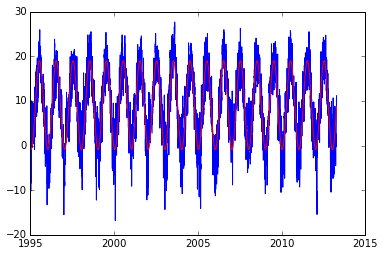

In [104]:
plot(time, temp, label="data")
plot(time, temp_opt, c="r", label="fitting")